## Using the map widget

The `GIS` object includes a map widget for displaying geographic locations, visualizing GIS content, and displaying the results of your analysis. To use the map widget, call `gis.map()` and assign it to a variable that you will then be able to query to bring up the widget in the notebook:

In [1]:
import arcgis
from arcgis.gis import GIS
# Create a GIS object
gis = GIS(profile = "your_online_profile")

In [2]:
# Create a map widget
map1 = gis.map('Louisiana') # Passing a place name to the constructor
                               # will initialize the extent of the map.
map1

MapView(layout=Layout(height='400px', width='100%'))

### Adding layers to the map
An important functionality of the map widget is its ability to add and render web layers. To add a layer, call the `add_layer()` method and pass the layer object as an argument.

#### Add search result to the map

Next, search via your `GIS` instance to add the desired result to the map:

In [3]:
flayer_search_result = gis.content.search("Points; owner:esri","Feature Layer", outside_org=True)
flayer_search_result

[<Item title:"USA Drilling Platforms (Mature Support)" type:Feature Layer Collection owner:esri>,
 <Item title:"World Exclusive Economic Zone Boundaries" type:Feature Layer Collection owner:esri>,
 <Item title:"Request Tracking" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Submerged Lands Act Boundary (Mature Support)" type:Feature Layer Collection owner:esri>]

In [4]:
map1.add_layer(flayer_search_result[0])

#### Adding layer objects to the map
You can add a number of different layer objects, such as `FeatureLayer`, `FeatureCollection`, `ImageryLayer`, `MapImageLayer`, to the map. For example, you can add a `FeatureLayer`, as shown below:

In [5]:
us_states_item = gis.content.get('e26f2752e86d4a8dad52ea75501480f0')
us_states_layer = us_states_item.layers[0]
us_states_layer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_States_analysis_trim/FeatureServer/0">

In [6]:
map1.add_layer(us_states_layer)

In [ ]:
map1

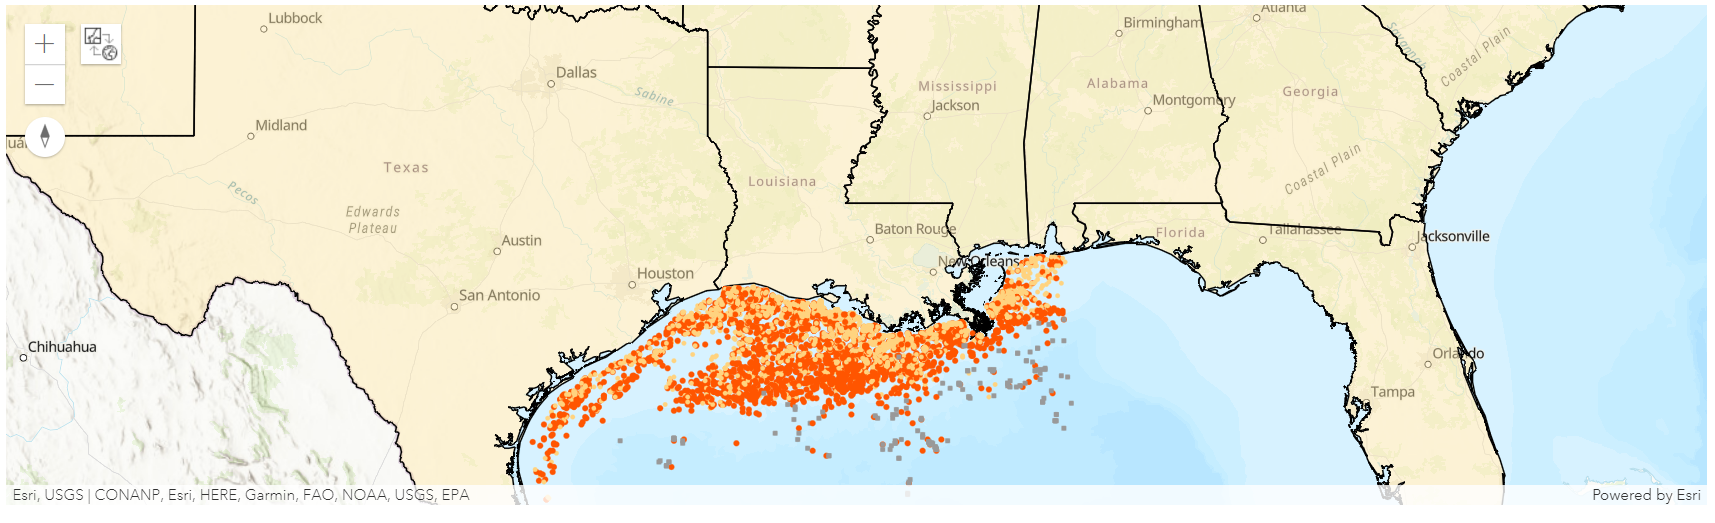

In [8]:
map1.layers

[<FeatureLayer url:"https://oceans1.arcgis.com/arcgis/rest/services/USA_Drilling_Platforms/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_States_analysis_trim/FeatureServer/0">]

### Custom Symbology
By using the smart mapping capability, you can author the map just by specifying the renderer type and the field to use and your GIS does the rest such identifying a suitable color scheme based on your basemap and the min and max values for the color ramp.  
  
https://developers.arcgis.com/python/guide/advanced-cartography-part1/

In [ ]:
map2 = gis.map("Louisiana")
map2

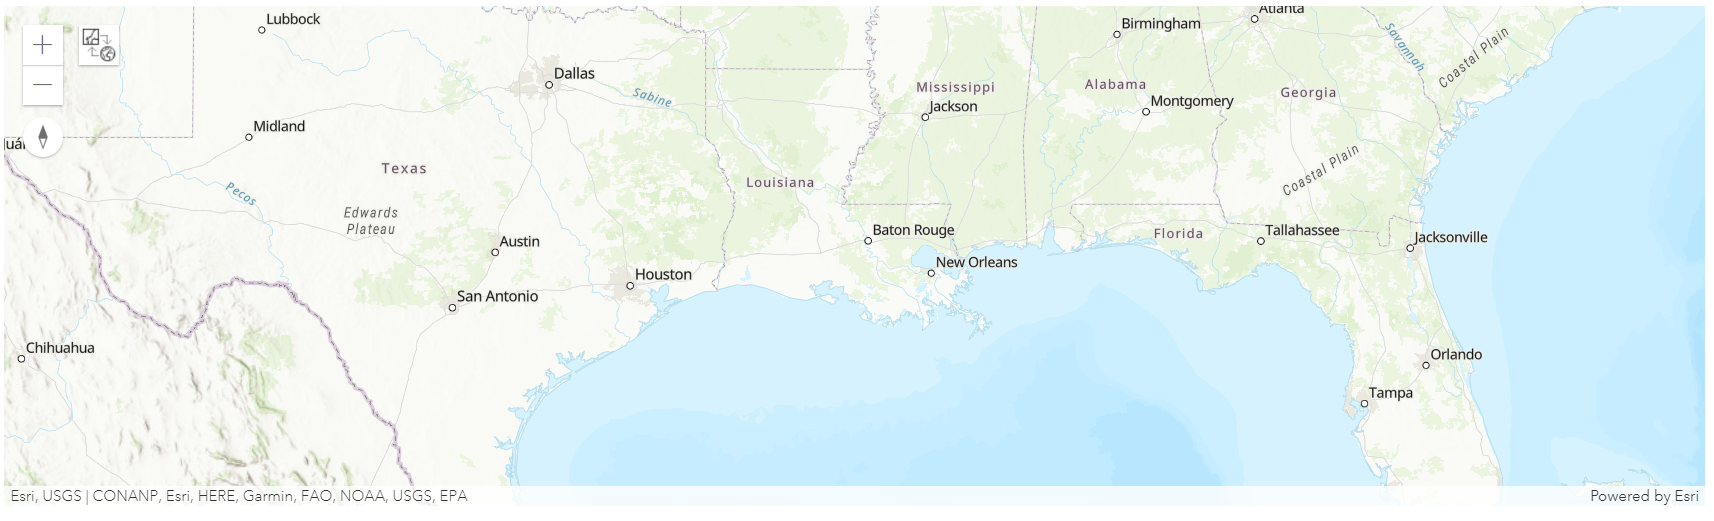

In [10]:
# Assign a new renderer to the layer when adding
map2.add_layer(flayer_search_result[0], {"renderer":"ClassedColorRenderer", "field_name": "waterdepth"})

In [11]:
# Change the renderer dictionary of the layer before adding
renderer = us_states_layer.renderer
renderer["symbol"]["color"] = [0, 0, 255, 118]
us_states_layer.renderer = renderer
map2.add_layer(us_states_layer)

In [13]:
map2

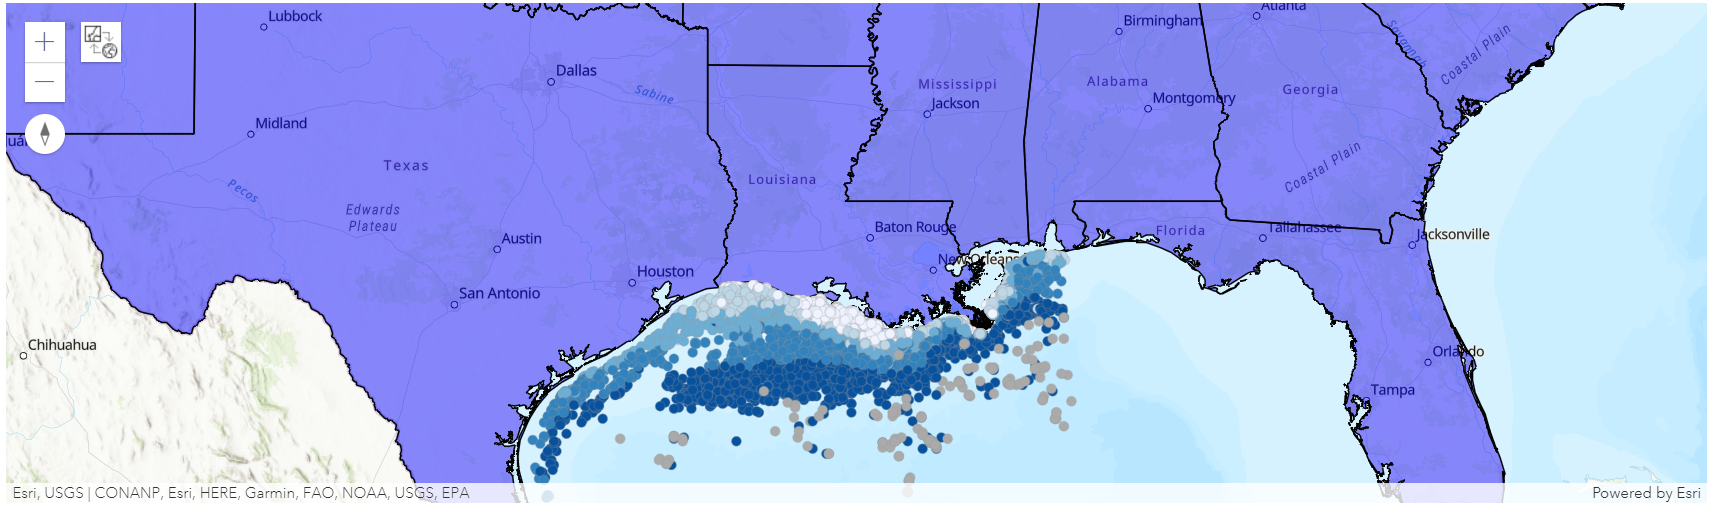

### Saving the map as a web map
Starting with the Python API version 1.3, you can save the map widget as a web map in your `GIS`. This process persists all the basemaps, layers added with or without your custom symbology (including smart mapping), pop-ups, extent, and graphics drawn (with or without custom symbols) as layers in your web map.

To save the map, call the `save()` method. This method creates and returns a new Web Map Item object. As parameters, you can specify all valid `Item` properties as shown below:

In [15]:
webmap_properties = {'title':'USA WebMap',
                    'snippet': 'Jupyter notebook widget saved as a web map',
                    'tags':['automation', 'python']}

webmap_item = map2.save(webmap_properties)
webmap_item

<Item title:"USA WebMap" type:Web Map owner:your_username>

## Properties of the map widget

### Operations of the map widget

The map widget has several properties that you can query and set, such as its zoom level, basemap, height, extent, mode, heading, rotation, tilt, scale, etc.

#### Zoom Level


In [ ]:
# Create a map widget
map3 = gis.map('Redlands, CA') # Passing a place name to the constructor
                               # will initialize the extent of the map.
map3

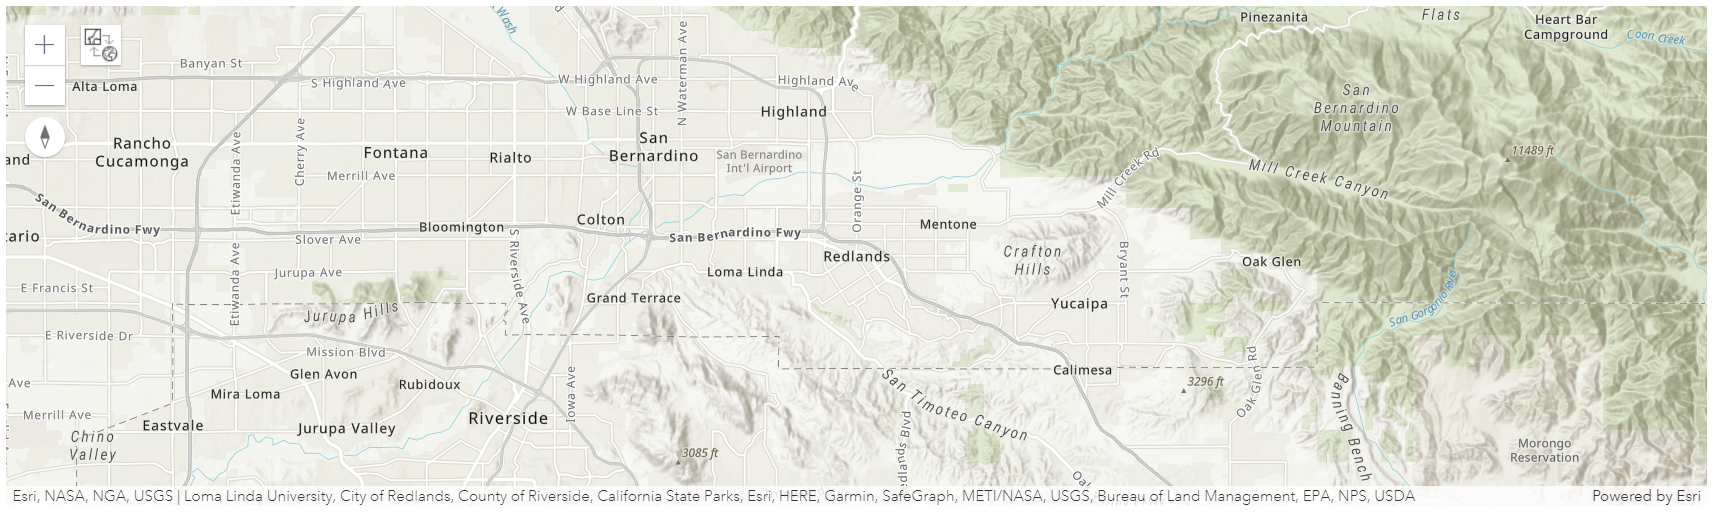

In [20]:
map3.zoom

11.0

Assigning a value to the zoom property will update the widget, which is equivalent to manually clicking the "zoom in" button twice.

In [21]:
map3.zoom = 9

In [ ]:
map3

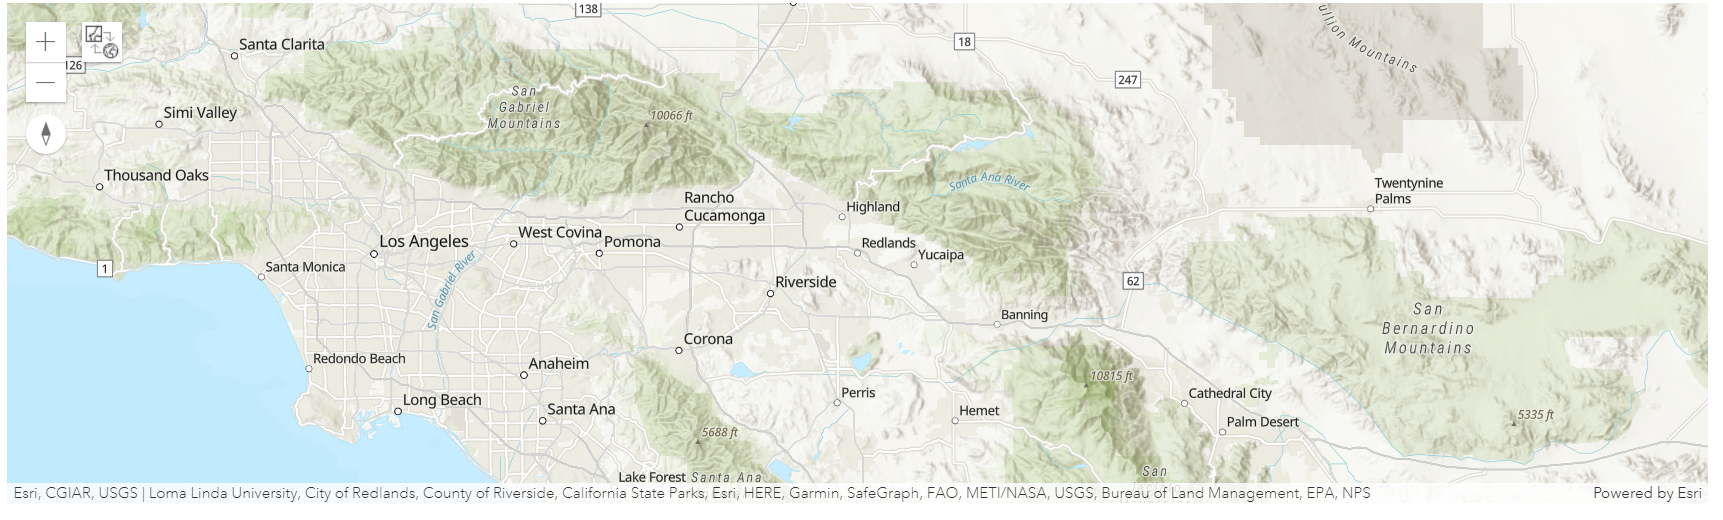

You can also set the rotation property for the 2D mode. This can similarly be achieved by right-clicking and dragging on the map.


#### Map Center

The center property reveals the coordinates of the center of the map.

In [ ]:
map4 = gis.map("Santa Fe") # creating a map object with default parameters
map4

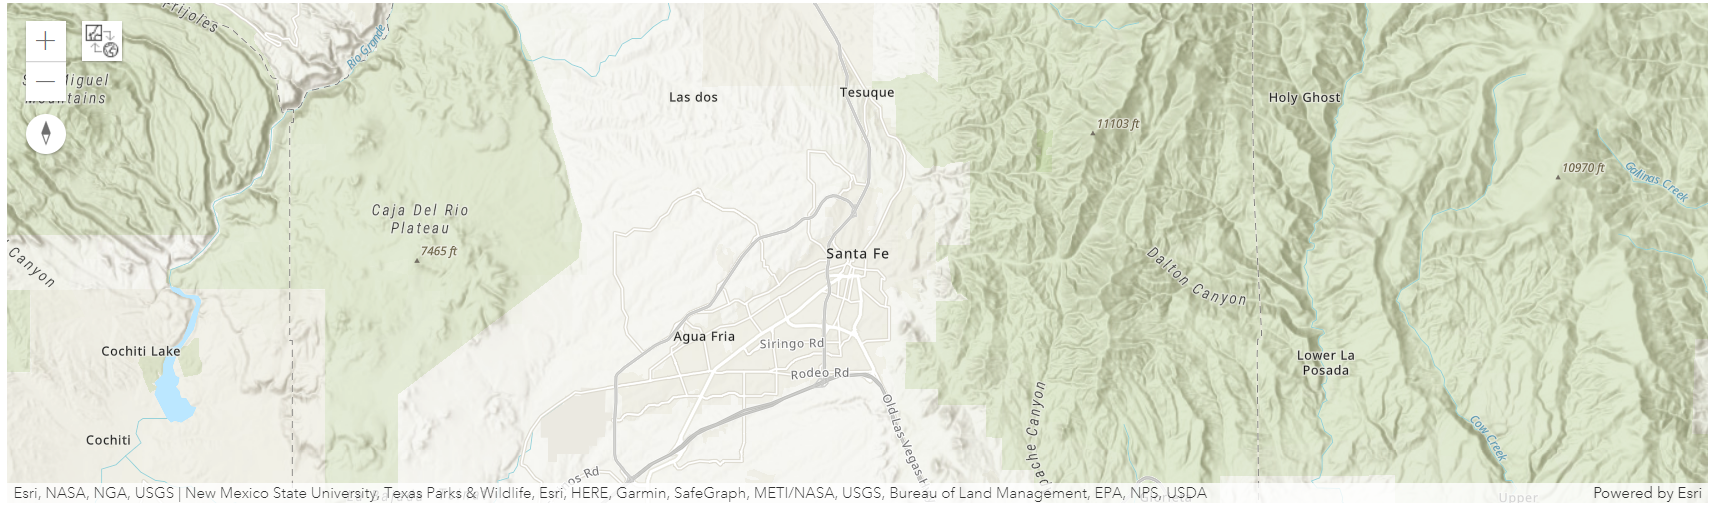

In [23]:
map4.center

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': -11792990.9323356,
 'y': 4258299.619291896}

If you know the latitude and longitude of your place of interest, you can assign it to the center property. For instance, we can now set the center to be within California.

In [26]:
map4.center = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
               'x': -13044706.248636946,
               'y': 4036244.856763349}

#### Basemap

Basemaps are layers on your map over which all other operational layers that you add are displayed. Basemaps typically span the full extent of the world and provide context to your `GIS` layers. It helps viewers understand where each feature is located as they pan and zoom to various extents.

When you create a new map or scene, you can choose which basemap you want from the basemap gallery in the Map Viewer. 

When your `gis` connection is created anonymously, the `basemaps` and `gallery_basemaps` properties of the created `MapView` object displays the default themes. While signing onto your own organization, the two properties would display your own customized options if set.

Your map can have a number of different basemaps. To see what basemaps are included with the widget, query the `basemaps` property:

In [28]:
map4.basemap # the current basemap being used

'default'

In [29]:
map4.basemaps # the basemap galleries

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

You can assign any one of the supported basemaps to the `basemap` property to change the basemap. For instance, you can change the basemap to the `satellite` basemap as below:

In [30]:
map4.basemap = 'satellite'

In [32]:
map4

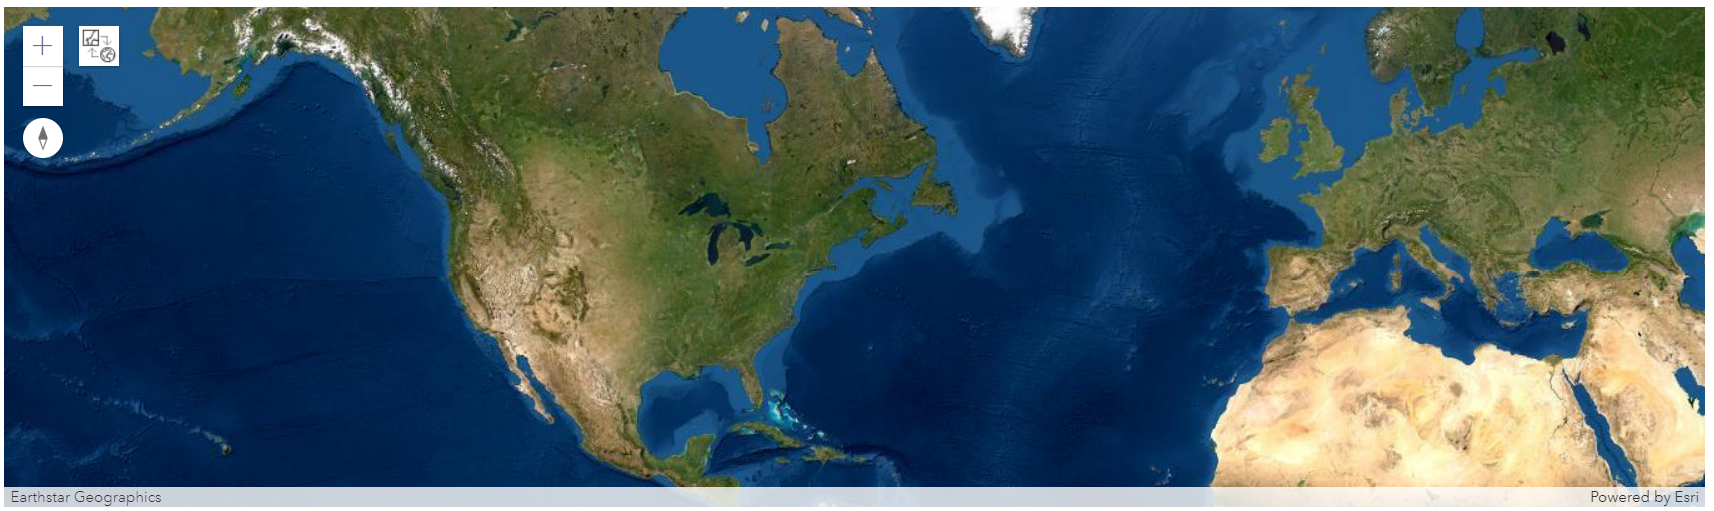

In [34]:
map4.basemap

'satellite'